# 📚 Introducción al procesamiento de imágenes: desde una foto manuscrita hasta el dataset Digits

Este cuaderno te guía paso a paso para convertir una imagen de un número manuscrito en una entrada válida del dataset `digits` de sklearn (imágenes de 8x8 píxeles con intensidades de 0 a 16).


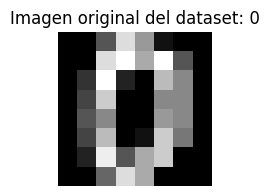

Subí una imagen manuscrita (número entre 0 y 9, fondo blanco preferido)...


Saving numero 1.jpg to numero 1.jpg


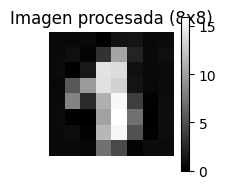

Forma de la imagen: (8, 8)
Valores:
 [[ 0.6  0.6  0.6  0.   1.1  1.3  0.5  0.6]
 [ 0.6  0.9  0.3  3.1 10.4  2.2  0.6  0.9]
 [ 0.7  0.   1.6 14.2 13.8  1.   0.6  0.7]
 [ 0.5  5.5  9.7 14.1 13.1  1.3  0.5  0.7]
 [ 0.6  8.2  2.7 11.  15.6  3.9  0.1  0.8]
 [ 0.7  0.1  0.  10.2 16.   7.   0.   0.9]
 [ 0.6  0.8  0.2 11.5 15.5  5.1  0.1  0.8]
 [ 0.6  0.6  0.4  7.2  4.6  0.3  0.8  0.7]]


In [2]:
# Paso 1: Importación de librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from sklearn.datasets import load_digits
from google.colab import files

# Paso 2: Cargar el dataset original para comparar
digits = load_digits()

# Paso 3: Mostrar una imagen original como referencia
plt.figure(figsize=(2, 2))
plt.imshow(digits.images[0], cmap='gray')
plt.title(f'Imagen original del dataset: {digits.target[0]}')
plt.axis('off')
plt.show()

# Paso 4: Subir una imagen manuscrita (ej: un "0" escrito a mano y fotografiado con fondo claro)
print("Subí una imagen manuscrita (número entre 0 y 9, fondo blanco preferido)...")
uploaded = files.upload()

# Paso 5: Procesamiento de la imagen
for fn in uploaded.keys():
    # Abrir imagen
    img = Image.open(fn).convert('L')  # Convertir a escala de grises

    # Invertir colores: fondo negro y número blanco (como en digits)
    img = ImageOps.invert(img)

    # Recortar bordes blancos innecesarios automáticamente
    img = ImageOps.autocontrast(img)

    # Redimensionar a 8x8
    img_resized = img.resize((8, 8), Image.LANCZOS)

    # Convertir a matriz numpy
    img_array = np.array(img_resized)

    # Normalizar valores a rango 0–16 (como el dataset digits)
    img_scaled = (img_array / 255.0) * 16
    img_scaled = img_scaled.astype(np.float64)

    # Mostrar imagen procesada
    plt.figure(figsize=(2, 2))
    plt.imshow(img_scaled, cmap='gray')
    plt.title('Imagen procesada (8x8)')
    plt.colorbar()
    plt.axis('off')
    plt.show()

    # Ver forma y valores de la imagen procesada
    print("Forma de la imagen:", img_scaled.shape)
    print("Valores:\n", np.round(img_scaled, 1))
